In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
X_train_path = '../data/processed/X_train.csv'
X_test_path = '../data/processed/X_test.csv'
y_train_path = '../data/processed/y_train.csv'
y_test_path = '../data/processed/y_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).squeeze()
y_test = pd.read_csv(y_test_path).squeeze()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (121310, 10)
Test set shape: (30328, 10)

Features: ['PartyType_Code', 'Sobriety_Code', 'Age', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'VehicleDamage_Code', 'MovementPrecedingCollision_Code', 'ViolationCode', 'CrashTime', 'Distance']


Accuracy Score: 0.6512463729886574
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.78      0.83      0.81     16695
       Minor       0.52      0.56      0.54      8507
    Moderate       0.34      0.25      0.29      3967
      Severe       0.23      0.11      0.15       896
       Fatal       0.40      0.21      0.28       263

    accuracy                           0.65     30328
   macro avg       0.45      0.39      0.41     30328
weighted avg       0.63      0.65      0.64     30328



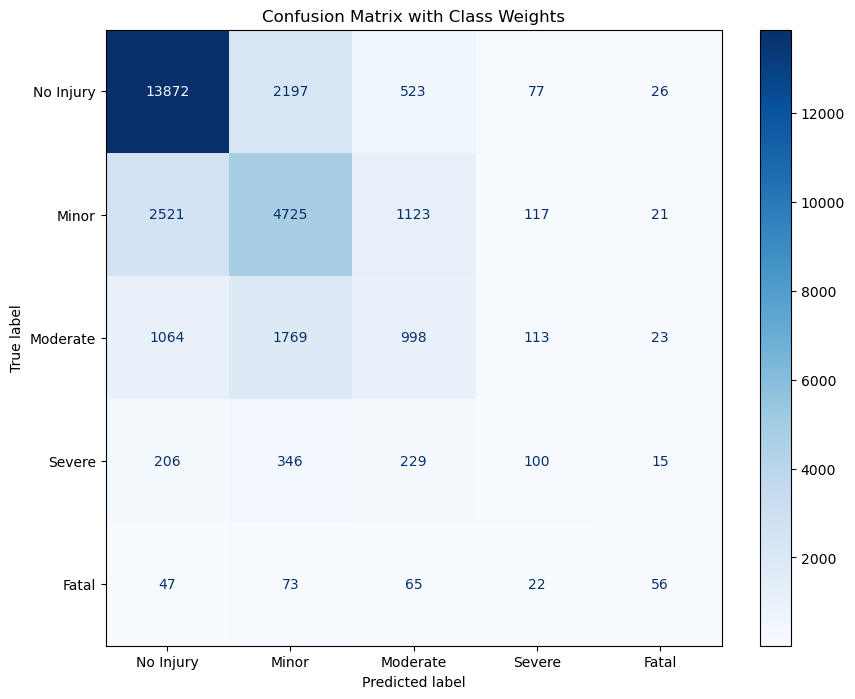

In [3]:
severity_mapping = {'NoInjury': 0, 'Minor': 1, 'Moderate': 2, 'Severe': 3, 'Fatal': 4}
classes = np.unique(y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Create a pipeline with scaling and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weight_dict))
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix with 'Blues' color map
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Injury', 'Minor', 'Moderate', 'Severe', 'Fatal'])
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix with Class Weights')
plt.show()